## Content

- Isolation Forest

- One Class SVM

- LOF

- Comparison of methods

## **Isolation Forest**

Consider a dataset $D$ which contatins datapoints $x_{1}, x_{2}...., x_{n}$
Just like Random forests, Isolation Forests builds many trees. Let's see the intition behind Isolation Forest

#### **Intuition**

These are the stpes involved in Isolation Forest:
- Build many trees like random forests
- For each tree:
  - Randomly pick a feature
  - Randomly threshold that feature
  - Build each tree until the leaf consists of only one datapoint

Isolation Forests are also known as **iForests**

Consider the plot along feature $f_{1}$ and $f_{2}$ given below

<img src='https://drive.google.com/uc?id=1M-1zWiqRj0SdzZds9zwbrqtIV4kRrf__'>

In isolation forests, we are building totally random trees. So if we pick feature $f_{1}$ and put a threshold there will be a vertical bar.

Similarly, if we pick feature $f_{2}$ and put a threshold there will be a horizontal bar.

For example, if we pick feature $f_{1}$ and we select threshold as $f_{1} < -1$, then our first root node will be based on this condition

<img src='https://drive.google.com/uc?id=1bAm1mIoNAgAP_RVOHan1gCw31ZYpHnNX'>


**Q. Based on the diagram below, on an average, between $x_{1}$ and $x_{2}$ which node will be at more depth containing?**

  - The node containing $x_{1}$ will be at more depth.
  - Observe that the point $x_{1}$ is in dense region, and point $x_{2}$ is far away
  - That is because, to break the point $x_{1}$ from all the other points, more and more splits will be required and that will increase the depth of the node containing point $x_{1}$

**Q. What is the whole idea behing Isolation Forest?**

So, to sum it up, the idea behind Isolation forest is,
  - On an average **outliers** have **lower depth** in the random trees
  - On an average, **inliers** have **more depth** in the random trees

#### **Evaluation of Isolation Forest**

> **Instructor's Note:**
Below given questions are some good questions were asked by students in previous batch. You can use for interactivity or continue with flow.

#### **Q. How can we evaluate Isolation Forests?**

- Imagine, we have build $100$ random trees. For each point $x_{i}$ in the dataset, we can get an average depth.

- We use this average depth to convert into a metric.

- Apart from this, there are lot of different metrics, that people have came up with over the years

- But, the basic intuition is that lesser the average depth, higher likelihood is there that it is an outlier

#### **Q. But, how do we decide average depth for a point to be classified as an outlier?**

- There is no one metric specifically used for average depths in iForests. At the end, whichever metric you use, it is based on the threshold.

- There are a lot of metrics that researchers have came up with over the years.

- But, studying them in this lecture is out of scope.

#### **Q. But, what if the number of datapoints is large? Wouldn't it mess up the Isolation Forests?**

- iForests can be made on subset of samples.
- We use this subset as train dataset and the rest of the data as test dataset

<img src='https://drive.google.com/uc?id=1g_WcPpDCE-z2pE1QHF5Mz47gAIgst9lI'>

#### **Quiz-3**
```
In isolation forests, on the basis of what do we select a threshold for a split?

a. Gini Impurity
b. Entropy
c. Information Gain
d. Random splits
```
**Answer:**

d. Random splits

#### **Sklearn Implementation**

We can implement Isolation Forest with the help of sklearn's **IsolationForest** method present in **ensemble** module.

Lets see some of the parameters that **IsolationForest** expects

**1. n_estimators:** It represents the number of base learners. By default, the value is set equal to $100$

**2. max_sample:** It is the number of samples to extract from the dataset to build the trees(row sampling). By default the value is set to **auto** and sklearn picks reasonably a good figure for iForests

**3. contamination:** It tells the proportion of outliers in the data. The range is between $[0, 0.5]$

**4. max_features:** It is the number of features to extract from the dataset to build the trees(column sampling).

- To predict whether it is an outlier or an inlier, we pass the new datapoint just as we passed in Elliptic Envelope. It return $-1$ if outlier, or else it returns $1$

In [ ]:
!gdown 1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg

Downloading...
From: https://drive.google.com/uc?id=1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg
To: /content/AnomalyDetection.csv
100% 33.0k/33.0k [00:00<00:00, 64.7MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)

In [ ]:
df = pd.read_csv('/content/AnomalyDetection.csv')
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
# using same data that we used in Elliptical Envelope -----> X
clf = IsolationForest(random_state=0, contamination = 0.08).fit_predict(df.iloc[:, :-1])
df['is_outlier_if'] = clf

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


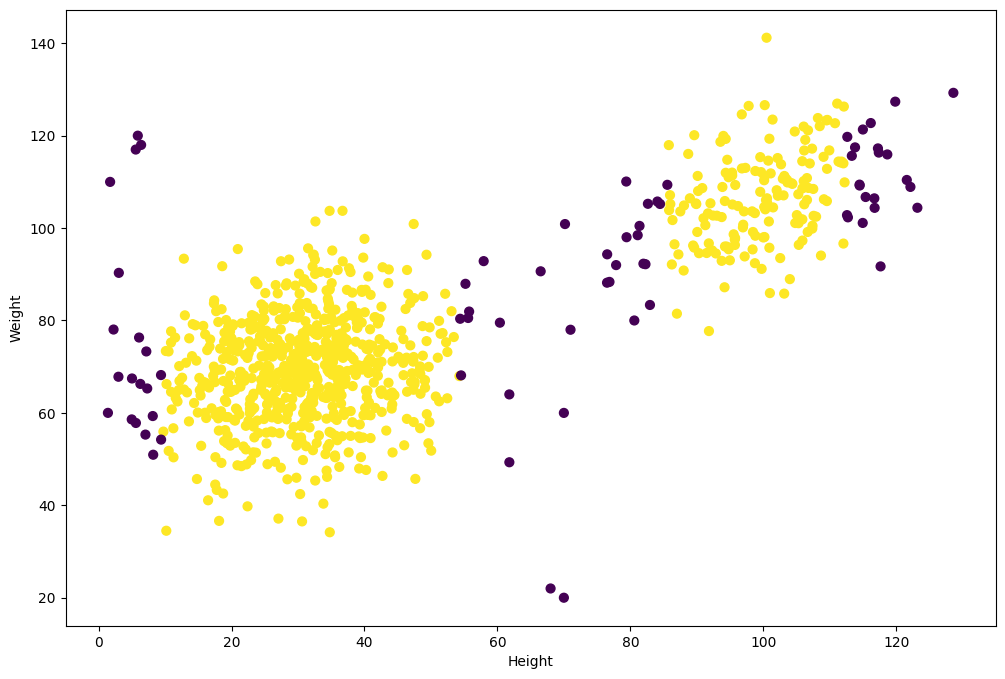

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_if'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

Isolation Forests are heavily used when dataset size is very large because algorithms like Elliptical Envelope are typically harder and they have very strong assumptions


#### **Major Disadvantage of Isolation Forest**

**One of the major limitation of iForests is that they are biased towards axis parallel splits.**

iForests makes splits and these splits are always parallel to either of the axis.

Because of this, the boundary will not be smoothed.
  
  - In the diagram given below, the different shades of blue represents the likelihood of a point to be an outlier. Darker the color, it is more likely that the point in that region will be an outlier

  - We've trained iForest model using training data(white points)
  
  - It is tested on testing data(red + green) where red color indicates outliers

<img src='https://drive.google.com/uc?id=15sjw7k2hyq0heM7cIhR0Qf_bzvPs_USL'>

Credits: https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py


Now imagine two points $x_{1}$ and $x_{2}$. $x_{1}$ as shown in the diagram given below.

- Both the points are almost equidistant from nearest cluster. $x_{1}$ is on the axis and point $x_{2}$ is off axis.

- Because the model is biased towards axis, it will classify point $x_{1}$ as an inlier and $x_{2}$ as an outlier

This is also known as banding in signal processing

<img src='https://drive.google.com/uc?id=1zX88A8FH0KdyZaYGPbZzvSFtnqTbzhYq'>

Now, let's see another algorithm, known as "One-Class SVM".

**Assessments Covered:**
- https://www.scaler.com/hire/test/problem/18518/
***

## **One-Class SVM**

There is a whole area of Machine Learning known as **One-Class Classifiers**. The idea is we have a data that consists of only one single class.

Based on this, every datapoint would be considered as inliers and there would not be any outliers.

**Q. So, how will we extract outliers from the data with One-Class SVMs?**

Let's see how One-Class SVMs work

#### **Intuition**

The beauty of the SVMs is the **kernel trick**.
It means that while our data might be of lower dimensions, we can project the data to higher dimensions.

Suppose there are dense datapoints and a few outliers in a dataset as shown below
  - For this we want to find a cenroid $C$ and a smallest hypersphere with radius $r$ which contains most of the points in our dataset

  - For outliers, we allow some distance $\zeta_{i}$ from the boundary of that hypersphere

  - We define $\zeta_{i}$ as:
    - if the distance $d(x_{i}, C) \leq 0$, $\zeta_{i} = 0$
    - otherwise, $\zeta_{i} = $ distance $d(x_{i}, C) - r$, that is the distance of outlier from the boundary of the hypersphere


<img src='https://drive.google.com/uc?id=1aK04ROCv2tHZr68j3Ii8hP4xTQpW6JtJ'>

#### **Optimization**

So, in this case, optimization problem is as follow:
  - we want to find centroid $C$ and radius $r$ and slack variables $\zeta_{i}$s such that:
    - **min $r^2 + \sum_{i=1}^{n}\zeta_{i}$**

**Q. What do we optimize?**
  - We try to include all the points in the hypershpere. So, we want to minimize $\zeta_{i}$s, which means that we want to minimize the outliers

  - We also try to minimize $r^2$, which basically means that we want to compress the sphere as much as possible

  - But, if we keep compressing the sphere, the slack will increase. And hence, there is a tradeoff here

So, we add a hyperparameter $\lambda$ to the equation as follows:
  
  - **min $ r^2 + \lambda\sum_{i=1}^{n}\zeta_{i}$** such that $∀_{i}$ $dist^2(x_{i}, C) \leq r^2 + \zeta_{i}^2$ and $\zeta_{i} \geq 0$

  - This means that for the points where $\zeta_{i} \geq 0$, we label them as outliers

<img src='https://drive.google.com/uc?id=1C2EX5VlxwR_Y6Zd8C6-5peYKaU3Z9J-u'>

#### **Quiz-4**
```
In the optimization of One-class SVMS,  if we kept minimizing radius and ignore the slack variables, the hypershpere will include all the points
and no point will be marked as an outlier. Is the statement True or False?

a. True
b. False
```
**Answer:**

b. False

#### **Kernelization**

If you look at the optimization equations, we do not consider data points $x_{i}s$ anywhere except for $dist^2(x_{i}, C) \leq r^2 + \zeta_{i}^2$

**Q. In which form do $x_{i}s$ exist?**

- We dont need to know what $x{i}s$ and $C$ are, we can kernelize it

Suppose our original data is in $2D$ and we use **RBF-Kernel One-Class SVM**.

This will transform the data into any high dimension space and will give any complex shape

All we know is that it is some hypersphere in some high dimension space, while in 2D space, it can take any shape

<img src='https://drive.google.com/uc?id=1fiSI2ByV5qOn4q_WVFbdwerRdLtN0r1z'>

You might be curious about how One-Class SVM's results look like. Lets see it

In the plot given below, you can see how One-Class SVMs can get complex shapes and how well it handles the outliers (yellow points)

<img src='https://drive.google.com/uc?id=1W80kAWZj24EEpCcOofMzSukjPY2JfHgv'>



In [ ]:
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(kernel = 'rbf', gamma = 0.1, nu = 0.05).fit_predict(df.iloc[:, :2])
df['is_outlier_svm'] = ocsvm

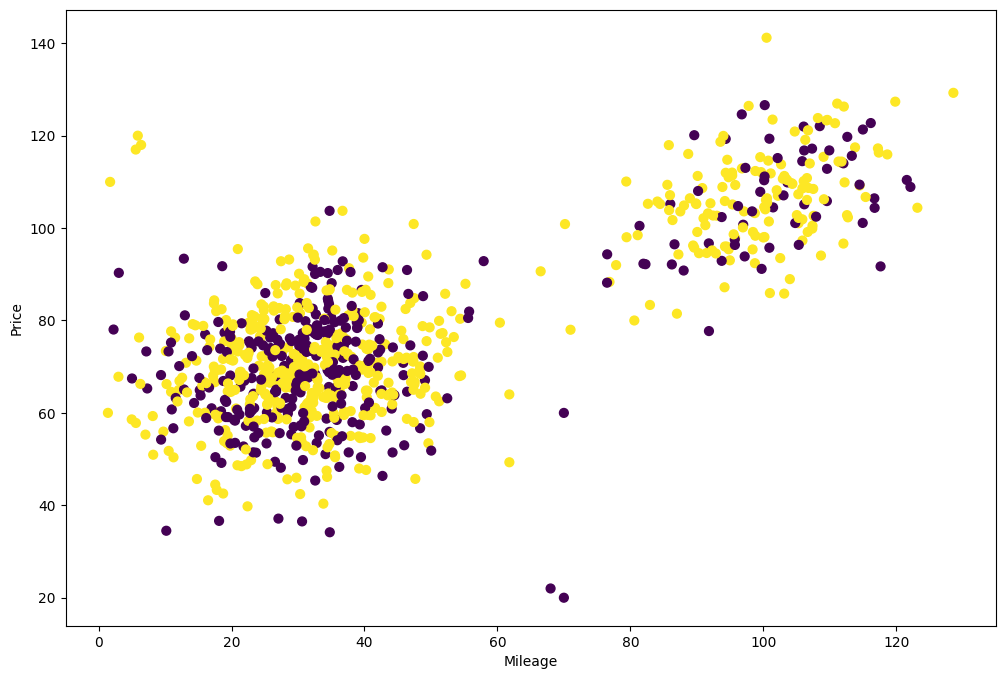

In [ ]:
plt.scatter(df['Mileage'], df['Price'], s=40, c=df['is_outlier_svm'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

#### **Disdvantages of One-Class SVMs**

As good as One-Class SVMs might sound, they have some limitations.
They are:

- Kernel Selection (RBF: default)
- As the number of datapoints ($n$) increases, time complexity increases
- All disadvantages of SVMs

With this, lets move to one last algorithm, Local Outlier Factor.
***

## **Local Outlier Factor (LOF)**

On a higher level, LOF is based on two ideas: **KNN** and **density**

The core idea behind LOF is to compare the density of a point with its neighbors' density

If the density of a point is less than the density of its $k$ neighbors, we flag that point as an outlier

Lets understand it more intuitively.

<img src='https://drive.google.com/uc?id=1nitxn2cZI0S0-WkgFtIPGUJ4oYyldJx_'>

#### **Intuition**

Imagine a bunch of datapoints as shown below

<img src='https://drive.google.com/uc?id=1PP4gMxs0e4SV3mYad9m6FZjZMDka5paA'>

We compute the density of a point based on average distance.
  - if average distane between a point and its $k$ nearest neighbors is large, it is more likely that the point will be an outlier
  - also, larger the value of $k$, more confident are the results

Moving forward, lets get familiar with some concepts to understand the working of LOFs

##### 1(a) **K-distance**

- We define K-distance of a point $A$ as the distance of point $A$ to its **$k^{th}$ nearest neighbor**

- In general, larger the value of k-distance is, farther away the points is from other datapoints

##### 1(b) **Set: $N_{k}(A)$**

- It is a set of k-nearest neighbors of point $A$

##### **2. Reachability distance**

- From point $A$ to point $B$, we define reachability distance as **maximum** of the  distance from point $A$ to point $B$ and the maximum k-distance of point $B$

- Consider point $B$ with some $k$ nearest neighbors shown in the diagram below.

<img src='https://drive.google.com/uc?id=16r3OGoSZWYAcC9sDkiadDt311feWt7Rp'>

- There is a possibilty that some neighbors might be close(condition 1) and some neighbors might be very far away(condition 2)

- In this case, there is a neighbor of point $B$ whose k-distance $>$ the distance between point $A$ and $B$, and hence, it is considered as its reachability distance

- In this case, point $A$ may or may not be a k-nearest neighbor of point $B$

##### **3. Local Reachability Density**

It is often represented as $lrd_{k}(A)$, which tells local reachability density of a point $A$

It is defined as the average reachability distance between point $A$ and $k$ neighbors

So, $lrd_{k}(A) = \LARGE\frac{\sum_{B \in N_{k}(A)} rd_{k}(A,B)}{N_{k}(A)}$

  - The summation in above equation represents the sum of reachability distances from a point $A$ and set of neighbors $B$ as $B \in N_{k}(A)$

<img src='https://drive.google.com/uc?id=1czSWF_VCieZrygElO5LPRCm8eEnmYIv1'>

Let us now use these 3 concepts to define LOF

#### **Putting all together**

We define Local Outlier Factore of point $A$ as follows:
  - $LOF_{k}(A)  = \LARGE\frac {\sum_{B \in N_{k}(A)} lrd_{k} (B) }  {|N_{k}(A)| . ldr_{k}(A)}$

$$$$

Whoa!!! This looks scary. What does it mean? Lets see.

$$$$

- $ldr_{k}(A)$ is nothing but the density of point $A$

$$$$

- The expression $\LARGE\frac {\sum_{B \in N_{k}(A)} lrd_{k} (B) }  {|N_{k}(A)|}$ is the average neighborhood density

- So, LOF of point $A$ is nothing but the average neighborhood density(lrd) of point $A$ divided by the density of $A$

<img src='https://drive.google.com/uc?id=1Srtxq_4Sn5KVSOKWIxeJwCRIKEz3ozZH'>

#### **Interpretation of LOF**

Now that we know how to compute LOF for a given point, questions is how to interpret it? Let's see.

- If $LOF(A) = 1$, then we can say that the point $A$ has same density(lrd) as its $k$ nearest neighbors

- If $LOF(A) > 1$, then the $k$ neighbors of point $A$ have higher denstiy than point $A$.
  - That does not mean point $A$ is an outlier. It may or may not be.
  - But if $LOF(A) >> 1$, then point $A$ is definitely an outlier.

- If $LOF(A) < 1$, then point $A$ has more denstiy than its $k$ nearest neighbors.

We compute the LOF for each point, and based on that extract the outliers

<img src='https://drive.google.com/uc?id=1lcT42E2qfJrXRdtVI7k_AhkEVGg5mM3I'>

Let's now see how the results look like:

<img src='https://drive.google.com/uc?id=1-Z2H7fBT6mFCeZhDk213qkA3L_nxjec_'>

You can see that extreme outliers have very high LOF values, while the border points of a dense region has slightly higher values than 1

We dont mark these border points as outliers.

There is a point with LOF value = 2.7383. We mark it as an outlier because it is certainly a lot higher 1.

These is one limitation of LOFs. We don't know what threshold to use and it often depends on the use case and is decided by the domain expert

#### **Quiz-5**
```
If LOF of two points P1 and P2 are 1.045 and 3.356, then in average which point will be marked as an outlier?

a. P1
b. P2
c. Both of them
d. Neither of them
```
**Answer:**

b. P2

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.065).fit_predict(df.iloc[:, :2])
df['is_outlier_lof'] = clf

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_lof'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

#### **Disadvantages of LOF**

1. Finding optimal K
2. Finding threshold.
  - If LOF(A) >> 1, what is the threshold??
3. Cannot handle high dimensional data efficiently
4. High Time Complexity



**Assessments Covered:**
- https://www.scaler.com/hire/test/problem/18439/
- https://www.scaler.com/hire/test/problem/24312/
- https://www.scaler.com/hire/test/problem/24307/
***

## Comparision of Methods

We'll now see a brief comparision of all these methods.

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py

The below given results were obtained from a toy dataset. Let's try to see where each methods performs well and where they might fail

<img src='https://drive.google.com/uc?id=185NwpgsYf0E4VkM9l_RQtjiL27uc97Co'>

**Case 1:** When data is dense at a certain region and sparse around it

- From row 1, We can see that all the methods that we studied performs relatively well when the data is dense at certain region and sparse around it

- You can observe that decsion boundary of One-class SVMs are a little bit broader than the cluster region which might include some outliers if present in that region


**Case 2:** When there are multiple dense regions in the data

- Here also, we can see that each methods performs relatively good.

- In elliptical enevlope(robust covariance) method, you can see the elliptical shapes being formed as a decision boundary. This can include some noise points if present inside the ellipse

**Case 3:** When one cluster is highly dense and other cluster is a little spread out

- Same problem arises with the elliptical envelope method as we saw in the previous case

- Other methods perform quite well and similar.

**Case 4:** When data has two archs

- In this case, you can see that the points in the outer parts of the archs are marked as outliers by all the methods, although they are a part of the archs

**Case 5:** When data is randomly spread

- All the algorithms marks the extreme points at all the four vertices as an outliers

Isolation Forests and LOF, both worked relatively well compared to other methods for all the cases, which explains why they are used oftenly in the industry

***
***